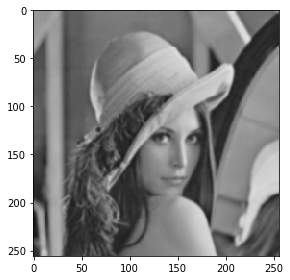

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from skimage import color, data, restoration
from skimage import io
from skimage.color import rgb2gray
from scipy.signal import convolve2d as conv2

tmpImg = io.imread('Lenna.jpg')
img = rgb2gray(tmpImg)
img = ndi.gaussian_filter(img,1,truncate = 4)
io.imshow(img)

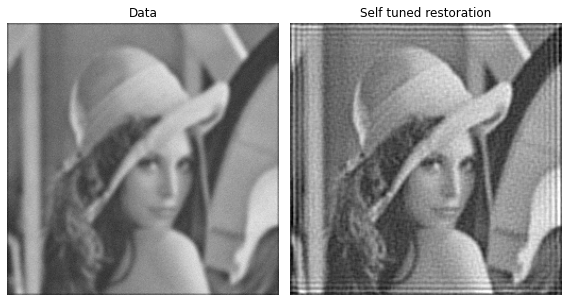

In [7]:
'''
不用fft進行 Wiener filter
'''
psf = np.ones((5, 5)) / 25
astro = conv2(img, psf, 'same')
astro += 0.1 * astro.std() * np.random.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()
ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

In [ ]:
'''

'''